<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

To copy the notebook, go to File and click create "Save a copy to ..." and work on that copy.

Please submit a pdf of the page of your notebook (Ctrl + p on the page, save as pdf, and submit that pdf) on gradescope.

Please remember to assign pages to the appropriate questions. Not doing so will result in the deduction of points. Please submit a **pdf** version of the colab notebook.

# Homework 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 0 part a

Do you have any questions or confusions about the previous lectures? (This is optional to answer)

(answer here)

## Question 0 part b
Any suggestions or thoughts about the course? (This is optional to answer)

(answer here)

## Question 1: Gradient Descent for Logistic Regression for two labels (50 points)

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_cancer = load_breast_cancer()
X_wis = data_cancer.data
y_wis = data_cancer.target
X_train_wis, X_test_wis, y_train_wis, y_test_wis = train_test_split(
    X_wis, y_wis, test_size=0.3, random_state=42)
# np.random.seed(42)
sc_2=StandardScaler()
X_transform_wis =sc_2.fit_transform(X_train_wis)

## Part 1 - Sigmoid or predict function (15 points)
\begin{align*}
\widehat{y}_i &= \sigma_w(x_i) = \frac{e^{w^Tx_i}}{1 + e^{w^Tx_i}} \\
\widehat{Y} &= \begin{bmatrix} \widehat{y}_1 \\
\widehat{y}_2 \\
\vdots \\
\widehat{y}_n\end{bmatrix} \\
X &= \begin{bmatrix} x^T_1 \\
x^T_2 \\
\vdots \\
x^T_n \end{bmatrix}
\end{align*}
where $x_i$ is an instance of $X$ with dimensions $p \times 1$
Let's build a function that applies the sigmoid function to $X$ with dimensions $n \times p$ with a given $w$ ($p \times 1$) and it outputs $\widehat{Y}$ with dimensions $n \times 1$. Assume the intercept vector is already included in $X$

Implement this without loops for full credit.

In [3]:
#############################################################################
# [Question 4 Part 1: 15 points]                                             #
# TODO:                                                                     #
# Implement the sigmoid function with the formula provided                  #
# Input: X of shape (n, p), w of shape (p,)                                 #
# Output: predicted y of shape (n, 1)                                       #
#                                                                           #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def sigmoid(X, w):
  #############################################################################
  #                              START OF YOUR CODE                           #
  #############################################################################
  result = X@w
  denominator = 1 + np.exp(result)
  sigmoid = np.exp(result)/ denominator
  # print(sigmoid.shape)
  return sigmoid
  pass
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [4]:
np.random.seed(42)
exp_w = np.random.randn(X_transform_wis.shape[1],1)
print(sigmoid(X_transform_wis, exp_w)[np.random.randint(
    X_transform_wis.shape[0], size = 10)])

[[0.99469177]
 [0.9843891 ]
 [0.87386242]
 [0.95225573]
 [0.6820093 ]
 [0.8029575 ]
 [0.94112977]
 [0.87773828]
 [0.00122929]
 [0.95828192]]


## Part 2: Logisitic Regression (35 points)


The loss function for Logistic Regression is:
\begin{align*}
l_w(\widehat{y}_i, y_i) &= \left\{
  \begin{array}{lr}
        -\log(\sigma_w(x_i)), & \text{if } y_i = 1\\
        -\log(1 - \sigma_w(x_i)), & \text{if } y_i = 0
    \end{array}
  \right\} \\
  &= -y_i\log(\sigma_w(x_i)) - (1 - y_i)\log(1 - \sigma_w(x_i))\\
  L(w) &= \frac{1}{n}\sum_{i =1}^n l_w(\widehat{y}_i, y_i)
\end{align*}

The gradient of $L(w)$ is as follows:
\begin{align*}\nabla_w L(w) &= \frac{1}{n}\sum_{i =1}^n \left(\widehat{y}_i - y_i\right)x_i \\
&= \frac{1}{n} X^T\left(\widehat{Y} - Y\right)
\end{align*}

Write gradient descent for logistic regression which will output $\widehat{w}$ and the training loss of the model using $\widehat{w}$ with a given $X$ matrix with dimensions $n \times p$, $Y$ vector with dimensions $n \times 1$, $\eta$ learning rate, $w_0$ initailization for $w$, and $\epsilon$ convergence condition. This algorithm should also plot the losses across all iterations (similar to lab).

Implement this using one loop for full credit.

Remember, the psuedo-code for gradient descent is

```

function grad_descent(X,y,init_weights, eta, epsilon):
  #suppose we had functions loss(y_hat,y) and Dloss(y_hat,y) that find
  #the loss and the gradient of the loss along with function f(weights)
  #that gives the function value

  initalize grad_update to a 0 vector of length (p+1)
  w = init_weights
  while True:
    for i in length(X):
      w_old = w
      y_hat = f(X[i], w)
      grad_update += (1/n)*Dloss(y_hat,y, X[i])
    w = w - eta*grad_update
    if norm(w - w_old) < epsilon:
      return w
```

In [5]:
def loss2(y_hat, y, x, w):
  return -y * np.log(sigmoid(x,w)) - (1-y) * np.log(1-sigmoid(x,w))

In [6]:
#############################################################################
# [Question 4 Part 2: 35 points]                                            #
# TODO:                                                                     #
# Implement Gradient Descent for Logistic Regression using the gradient.    #
# formula from above.                                                       #
# Input: X of shape (n, p), y of shape (n,), eta,                           #
#        initial_w of shape ((p + 1), ), epsilon                            #
# Output: w of shape ((p + 1), ) and Training loss using that weight.       #
# Also plot your losses across all iterations                               #
#                                                                           #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def log_grad_descent(X, y, eta, initial_w, epsilon):
  #############################################################################
  #                              START OF YOUR CODE                           #
  #############################################################################
  n, p = X.shape
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  new_y = np.array(y).reshape((n, 1))
  # Replace "pass" statement with your code
  grad_update = [0] * (p)
  w = initial_w
  # print("w shape is : ", w.shape)
  old_w = w
  loss = 0
  losses = []
  # print(len(new_X))
  while True:
    for i in range(len(new_X)):
      old_w = w
      # np @ p1 = n1
      y_hat = sigmoid(new_X, w)
      # print(y_hat.shape)
      # print(new_X.T.shape, y_hat.shape, new_y.shape)
      # pn @ p1 - p1 = p1
      value = (1/n) * new_X.T @ (y_hat - new_y)
      # p = p
      grad_update = value
      loss = 1/n * np.sum(-(new_y) * np.log(y_hat) -
       (1-new_y) * np.log(1-y_hat))
      losses.append(loss)
      # print("grad_update shape is " , grad_update.shape)

    # p1 = p1 - eta*p1
    w = w - (eta * grad_update)
    # print("new w shape is ", w.shape)
    # print(np.linalg.norm(w -old_w))
    if np.linalg.norm(w -old_w) < epsilon:
      plt.plot(range(1, len(losses) + 1), losses, label = "loss")
      plt.legend()
      plt.xlabel("iteration")
      plt.ylabel("Losses")
      plt.show()
      return w, losses[-1]
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

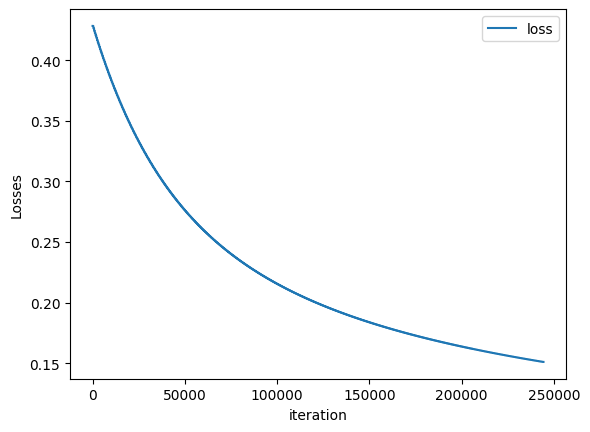

The training loss is 0.15099479989401432
The test loss is 0.11285591897824969
The weights of the first 10 variables are [[-0.37720156]
 [ 0.29755648]
 [ 1.28856019]
 [-0.43762814]
 [-0.31402327]
 [ 1.51956202]
 [ 0.57854198]
 [-0.6920729 ]
 [ 0.5582443 ]]


In [7]:
np.random.seed(42)
new_p = X_transform_wis.shape[1] + 1
w_graddescent , loss = log_grad_descent(X_transform_wis, y_train_wis, eta = 0.01, initial_w =np.random.randn(new_p,1), epsilon = 0.001)
pred_y_test = sigmoid(np.hstack((np.ones((X_test_wis.shape[0], 1)), sc_2.transform(X_test_wis))) , w_graddescent)
new_y = np.array(y_test_wis).reshape((y_test_wis.shape[0], 1))
print("The training loss is {}".format(loss))
print("The test loss is {}".format(-1/len(new_y) * (np.sum(np.multiply(np.log(pred_y_test), new_y)) + np.sum(np.multiply(np.log(1 - pred_y_test), 1-new_y)))))
print("The weights of the first 10 variables are {}".format(w_graddescent[1:10]))

# Question 2: Logistic Regression with multiple labels (50 points)
Now, let's try to extend this idea to logistic regression with multiple labels

In [8]:
from sklearn.datasets import load_iris

data_iris = load_iris()
X_iris = data_iris.data
y_iris = data_iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
# np.random.seed(42)
sc_3=StandardScaler()
X_transform_iris =sc_3.fit_transform(X_train_iris)

## Part 1 - One hot encoding (15 points)

If we have a vector $z$ with dimensions $n \times 1$ that contains $m$ labels stored in $l$ with dimensions $m \times 1$, the one hot encoding algorithm should return an $n \times m$ matrix $Y$ where $Y_{ij}$ is 1 if $z_i = l_j$ else it is 0.
\begin{align*}
Y = \begin{bmatrix} y_1^T \\
y_2^T \\
\vdots \\
y_n^T \end{bmatrix} = \begin{bmatrix} y_{11} & \cdots & y_{1m} \\
y_{21} & \cdots & y_{2m}\\
\vdots & \vdots & \vdots \\
y_{n1} & \cdots & y_{nm} \end{bmatrix}
\end{align*}
where $y_i$ is $m \times 1$ vector and it contains the encodings of $z_i$


For example,
If
\begin{align*}
z = \begin{bmatrix} Sahana \\
Eduardo \\
Jake \\
Eduardo \\
Jake \\
Jake \\
Eduardo \end{bmatrix}, l = \begin{bmatrix} Sahana \\
Eduardo \\
Jake  \end{bmatrix}
\end{align*}
Then $Y$ would be
\begin{align*}
Y = \begin{bmatrix} 1 & 0 & 0 \\
0 & 1& 0\\
0 & 0 & 1\\
0 & 1& 0\\
0 & 0 & 1\\
0 & 0 & 1\\
0 & 1 & 0\\  \end{bmatrix}
\end{align*}

You can think of the 1st column checking whether $z_i$ is Sahana, 2nd column checking whether $z_i$ is Eduardo, and 3rd column checking whether $z_i$ is Jake.

Implement this one hot encoding algorithm that returns $Y$ ($n \times m$) given $z$ ($n \times 1$) and labels $l$ ($m \times 1$)

Implement this without loops for full credit.

**Note: In each row, only one entry can be 1**


In [9]:
#############################################################################
# [Question 5 Part 1: 15 points]                                             #
# TODO:                                                                     #
# Implement one hot encoding with a given y and l                           #
# Input: z of shape (n, 1), l of shape (m,1)                                #
# Output: Y of shape (n,m)                                                  #
#                                                                           #
#############################################################################

def one_hot_encoding(z, l):
  #############################################################################
  #                              START OF YOUR CODE                           #
  #############################################################################
  # Replace "pass" statement with your code
  y = z == l.T
  return y
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [10]:
np.random.seed(42)
l = np.arange(3)
print(one_hot_encoding(y_iris.reshape((y_iris.shape[0], 1)), l)[np.random.randint(150, size = 10)])

[[False False  True]
 [False  True False]
 [ True False False]
 [False False  True]
 [False  True False]
 [ True False False]
 [False False  True]
 [False False  True]
 [False  True False]
 [False  True False]]


## Part 2 - Coding Implementation of Gradient Descent (35 points)

The loss function and gradient of it for this is:
\begin{align*}
l_{W}(\widehat{y}_i, y_i) &= -\sum_{j = 1}^{m}y_{ij}\log(\sigma_{w_j}(x_i))\\
  L(W) &= \frac{1}{n}\sum_{i =1}^n l_{W}(\widehat{y}_i, y_i) \\
  \frac{\partial l_{W}(\widehat{y}_i, y_i)}{\partial w_j} &= x_i(\widehat{y}_{ij} - y_{ij})\\
  \frac{\partial L(W)}{\partial w_j} &= \frac{1}{n}\sum_{i=1}^{n}x_i(\widehat{y}_{ij} - y_{ij})
\end{align*}

Using this information, implement gradient descent algorithm which will output $\widehat{W}$ and the training loss of the model using $\widehat{W}$ with a given $X$ matrix with dimensions $n \times p$, $y$ vector with dimensions $n \times 1$, $\eta$ learning rate, $W_0$ initailization for $W$, and $\epsilon$ convergence condition. **This algorithm should also plot the losses across all iterations** (similar to lab).

Implement this in two loops for full credit

The psuedocode in question 1 part 2 can also be applicable here



**Extra Credit (5 points)**: Implement this algorithm using only one loop

**Hint:** There are two approaches (that I can think of) -

1.   You can update each $w_j$ in $W$ using the derivative above (easier to do)
2.   Using the derivative above, Find $\nabla_W L(W)$ in matrix form and use this derivative to update $W$ all at once (this ties into the extra credit and is similar to how the psuedocode is set up)

Below is a function that outputs $$\sigma_{w_j}(w)$$

In [11]:
def softmax(X, W):
  arb = np.exp(X @ W.T)
  sums = np.tile(np.sum(arb, axis = 1).reshape((arb.shape[0], 1)), (1, arb.shape[1]))

  return np.divide(arb, sums)

In [12]:
#############################################################################
# [Question 5 Part 2: 35 points]                                            #
# TODO:                                                                     #
# Implement Gradient Descent for Logistic Regression using the gradient.    #
# formula from above.                                                       #
# Input: X of shape (n, p), y of shape (n,), eta,                           #
#        initial_W of shape (m, (p + 1)), epsilon                           #
# Output: W of shape (m, (p + 1)) and Training loss using that weight.      #
# Also plot your losses across all iterations                               #
#                                                                           #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def multilog_grad_descent(X, y, eta, initial_W, epsilon):
  #############################################################################
  #                              START OF YOUR CODE                           #
  #############################################################################
  n, p = X.shape
  # print(n,p)
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  new_y = np.array(y).reshape((n, 1))

  # Replace "pass" statement with your code
  grad_update = [0] * (p+1)
  w = initial_W
  # print("w shape is : ", w.shape)
  old_w = w
  loss = 0
  losses = []
  # print(new_y)
  # print(w)
  # print(len(new_X))
  label = np.arange(3)
  # print(label)
  while True:
    old_w = w
    y_hat = softmax(new_X, w)
    # print(y_hat)
    # # y_hat_ij
    # n1 x 13 = n3
    en_new_y = one_hot_encoding(new_y, label)
    # # y_ij
    # n1 x 13 = n3
    en_y_hat = one_hot_encoding(y_hat, label)
    # print(en_new_y)
    # print(en_y_hat)
    # pn @ (n3-n3) = p3 = 3p
    value = 1/n * np.transpose(new_X.T @ (y_hat - en_new_y))
    # value = (1/n) * np.transpose(new_X.T @ (y_hat - new_y))
    # print(value)
    grad_update = value
    # loss = 1/n * np.sum(-(new_y) * np.log(y_hat) - (1-new_y) * np.log(1-y_hat))
    l = 1/n * -np.sum(en_new_y * np.log(y_hat))
    # print(l)
    losses.append(l)
    # print("grad_update shape is " , grad_update.shape)
    # 3p = 3p - eta*3p
    w = w - (eta * grad_update)
    # print("new w shape is ", w.shape)
    # print(np.linalg.norm(w -old_w))
    if np.linalg.norm(w -old_w) < epsilon:
      # print(losses)
      plt.plot(range(1, len(losses) + 1), losses, label = "loss")
      plt.legend()
      plt.xlabel("iteration")
      plt.ylabel("Losses")
      plt.show()
      return w, losses[-1]
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

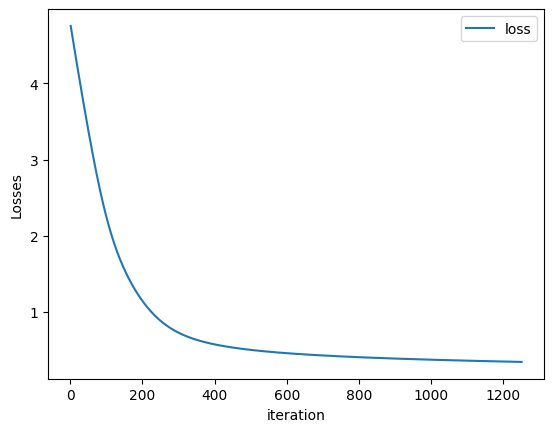

The training loss is 0.3378994965770479
The test loss is 0.3102277264899275
The weights are 
 [[-0.35350213 -0.97501444  1.60940177 -0.04295168 -1.71711663]
 [ 0.4485035   0.83476004 -0.29133805 -0.95154438 -0.28886014]
 [-0.29584187  1.11547316  0.33902182  0.13477129  0.58946562]]


In [13]:
np.random.seed(42)
new_p = X_transform_iris.shape[1] + 1
W_graddescent, training_loss = multilog_grad_descent(X_transform_iris, y_train_iris, eta = 0.01, initial_W =np.random.randn(3, new_p), epsilon = 0.001)
pred_y_test = softmax(np.hstack((np.ones((X_test_iris.shape[0], 1)), sc_3.transform(X_test_iris))) , W_graddescent)
new_Y_test = one_hot_encoding(y_test_iris.reshape((y_test_iris.shape[0], 1)) , np.arange(3))
print("The training loss is {}".format(training_loss))
print("The test loss is {}".format(-1/len(pred_y_test) * np.sum(np.multiply(np.log(pred_y_test), new_Y_test))))
print("The weights are \n {}".format(W_graddescent))